In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [2]:
imdb = keras.datasets.imdb
# 保留训练数据中出现频次在前10000位的字词，确保数据可管理，罕见字词将被舍弃
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 4s 0us/step


In [3]:
# 每个标签都是整数值0或1， 0表示负面影评， 1表示正面影评
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
# 影评文本已转换为整型数组， 每个整数表示字典中的一个特定字词
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
# 将整数转回字词
word_index = imdb.get_word_index()

word_index = {k: (v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["UNK"] = 2  # unknown
word_index["UNUSED"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 1s 1us/step


In [6]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert UNK is an amazing actor and now the same being director UNK father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for UNK and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also UNK to the two little boy's that played the UNK of norman and paul they were just brilliant children are often left out of the UNK list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have

In [7]:
# 准备数据，将影评整数数组转化成张量
# 填充数组，创建一个形状为maxLen*num-reviews的整数张量，后面使用一个能够处理这种形状的嵌入层作为网络中的第一层
# pad_sequences函数将长度标准化
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)
len(train_data[0]), len(train_data[1])

(256, 256)

In [8]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [9]:
# 构建模型： 使用几层？ 每层各多少各隐藏单元？
vocab_size = 10000

model = keras.Sequential()
# 第一层Embedding：该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量， 
# 模型训练时学习这些向量， 会向输出数组添加一个维度，生成的维度为：（batch，sequence，embedding）
model.add(keras.layers.Embedding(vocab_size, 16))
# GlobalAveragePooling1D层：通过对序列维度求平均值，针对每个样本返回一个长度固定的输出向量
model.add(keras.layers.GlobalAveragePooling1D())
# 上层返回的长度固定的输出向量会传入到全连接Dense层，包含16个隐藏单元
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# 最后一层与单个输出节点密集连接，应用sigmoid激活函数后，结果是0-1之间的浮点值，表示概率或置信水平
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0807 13:59:59.787665 4623869376 deprecation.py:506] From /Users/skylar/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0807 13:59:59.838794 4623869376 deprecation.py:506] From /Users/skylar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 由于这是一个二元分类问题且模型会输出一个概率（应用S型激活函数的单个单元层），
# 损失函数binary_crossentropy更适合，它可测量概率分布之间的差距
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0807 14:05:30.100747 4623869376 deprecation.py:323] From /Users/skylar/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
# 创建验证集
# 在训练时，需要检查模型处理从未见过的数据的准确率，从原始训练数据中分离出10000样本，创建一个验证集
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [12]:
# 训练模型
# 用有512个样本的小批次训练模型40次。在训练期间，监控模型在验证集的10000个样本上的损失和准确率
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 38us/sample - loss: 0.6915 - acc: 0.5581 - val_loss: 0.6888 - val_acc: 0.6090
Epoch 2/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6838 - acc: 0.6898 - val_loss: 0.6788 - val_acc: 0.7119
Epoch 3/40
15000/15000 [==============================] - 0s 25us/sample - loss: 0.6678 - acc: 0.7486 - val_loss: 0.6584 - val_acc: 0.7598
Epoch 4/40
15000/15000 [==============================] - 0s 23us/sample - loss: 0.6387 - acc: 0.7680 - val_loss: 0.6250 - val_acc: 0.7723
Epoch 5/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.5967 - acc: 0.7994 - val_loss: 0.5826 - val_acc: 0.7938
Epoch 6/40
15000/15000 [==============================] - 0s 24us/sample - loss: 0.5467 - acc: 0.8233 - val_loss: 0.5362 - val_acc: 0.8114
Epoch 7/40
15000/15000 [==============================] - 0s 27us/sample - loss: 0.4942 - acc: 0.8401 - val_loss: 0.

In [13]:
# 评估模型： 返回损失和准确率
results = model.evaluate(test_data, test_labels)
print(results)

25000/25000 [==============================] - 1s 26us/sample - loss: 0.3438 - acc: 0.8692
[0.34377965923786163, 0.8692]


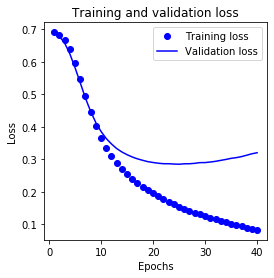

In [15]:
# 创建损失-时间变化图
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.figure(figsize=(4,4))
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

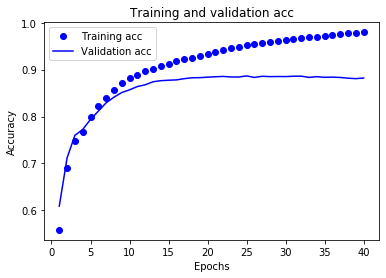

In [17]:
# 创建准确率-时间变化图
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()